In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
read_file=pd.read_csv(r'Churn_Modelling.txt')
read_file.to_csv(r'churn_modelling.csv',index=None)

In [4]:
# importing the dataset 
data=pd.read_csv("churn_modelling.csv")
x = data.iloc[:, 3:13]
y = data.iloc[:, 13]


In [5]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
# Create dummy variables 
geography = pd.get_dummies(data["Geography"],drop_first=True)
gender = pd.get_dummies(data["Gender"],drop_first=True)

In [7]:
# dropping the geography and gender columns from our dataset 
x=x.drop(["Geography","Gender"],axis=1)

In [8]:
# conactinating the dummy variables with our dataset 
x=pd.concat([x,geography,gender],axis=1)

In [9]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [10]:
# splitting the model into train and test data 
import sklearn 
from sklearn.model_selection import train_test_split 

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [12]:
# Feature scalling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [13]:
# Creating our own ANN 
import keras 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout 


Using TensorFlow backend.


In [14]:
# initialising ANN 
classifier = Sequential()


In [15]:
# adding input layer and the first 
classifier.add(Dense(output_dim=6,init="he_uniform",activation='relu',input_dim=11))

/Users/prashantgpoojara/Desktop/deep-learning/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="he_uniform")`
  


In [16]:
#adding second hidden layer 
classifier.add(Dense(output_dim=6, init="he_uniform", activation="relu")
              )

/Users/prashantgpoojara/Desktop/deep-learning/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="he_uniform")`
  


In [17]:
# adding the output layer 
classifier.add(Dense(output_dim=1, init="glorot_uniform", activation="sigmoid"))

/Users/prashantgpoojara/Desktop/deep-learning/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  


In [18]:
#compiling the ANN 
classifier.compile(optimizer="Adamax",loss="binary_crossentropy", metrics=["accuracy"])


In [19]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,nb_epoch=100)

/Users/prashantgpoojara/Desktop/deep-learning/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 3s 593us/step - loss: 0.6764 - accuracy: 0.6576 - val_loss: 0.5262 - val_accuracy: 0.7793
Epoch 2/100
5359/5359 [==============================] - 2s 374us/step - loss: 0.4944 - accuracy: 0.7918 - val_loss: 0.4751 - val_accuracy: 0.7952
Epoch 3/100
5359/5359 [==============================] - 2s 378us/step - loss: 0.4613 - accuracy: 0.8024 - val_loss: 0.4575 - val_accuracy: 0.8016
Epoch 4/100
5359/5359 [==============================] - 2s 377us/step - loss: 0.4461 - accuracy: 0.8089 - val_loss: 0.4487 - val_accuracy: 0.8065
Epoch 5/100
5359/5359 [==============================] - 2s 373us/step - loss: 0.4379 - accuracy: 0.8121 - val_loss: 0.4433 - val_accuracy: 0.8046
Epoch 6/100
5359/5359 [==============================] - 2s 439us/step - loss: 0.4310 - accuracy: 0.8156 - val_loss: 0.4402 - val_accuracy: 0.8061
Epoch 7/100
5359/5359 [==============================] - 3s 487us/step

5359/5359 [==============================] - 2s 374us/step - loss: 0.3385 - accuracy: 0.8627 - val_loss: 0.3643 - val_accuracy: 0.8501
Epoch 57/100
5359/5359 [==============================] - 2s 374us/step - loss: 0.3390 - accuracy: 0.8632 - val_loss: 0.3638 - val_accuracy: 0.8535
Epoch 58/100
5359/5359 [==============================] - 2s 373us/step - loss: 0.3386 - accuracy: 0.8636 - val_loss: 0.3642 - val_accuracy: 0.8523
Epoch 59/100
5359/5359 [==============================] - 2s 374us/step - loss: 0.3384 - accuracy: 0.8619 - val_loss: 0.3638 - val_accuracy: 0.8523
Epoch 60/100
5359/5359 [==============================] - 2s 372us/step - loss: 0.3382 - accuracy: 0.8614 - val_loss: 0.3637 - val_accuracy: 0.8527
Epoch 61/100
5359/5359 [==============================] - 2s 381us/step - loss: 0.3382 - accuracy: 0.8612 - val_loss: 0.3634 - val_accuracy: 0.8542
Epoch 62/100
5359/5359 [==============================] - 2s 377us/step - loss: 0.3381 - accuracy: 0.8617 - val_loss: 0.3637 

In [20]:
# list all the data in the history 
print(model_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


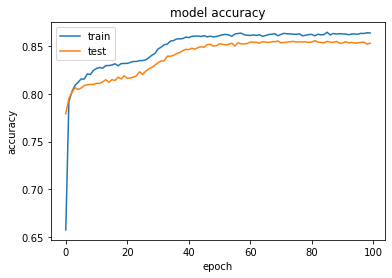

In [21]:
# summerize history for accuracy 
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


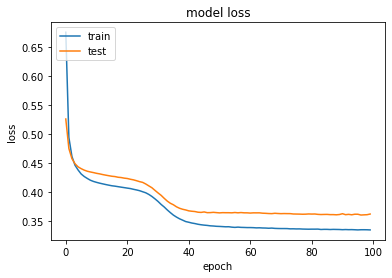

In [22]:
# summerize history for loss 
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

In [24]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [25]:
cm

array([[1502,   93],
       [ 198,  207]])

In [26]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)


In [27]:
score

0.8545

## Hyperparameter tuning using GridSearchCV

In [34]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV


In [35]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid
 

In [36]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=x_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    

In [37]:
model = KerasClassifier(build_fn=create_model, verbose=0)

In [38]:
layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)


In [39]:
grid_result=grid.fit(x_train,y_train)

RuntimeError: Cannot clone object <keras.wrappers.scikit_learn.KerasClassifier object at 0x1a77176590>, as the constructor either does not set or modifies parameter layers

In [ ]:
grid_result.best_score_,grid_result.best_params_